# Tarea.
Dado:  
* un alfabeto de dos símbolos (0,1) (m = 2), 
* secuencias de longitud l = 20, y 
* r en (1, 2, 3, 4, 5, ..., 15),  
Calcular Pm en función de r para dos casos: Con y sin desplazamiento.  

Para ello:  

Para cada valor r, llevar a cabo k = 30 experimentos MC:  
Sean So y S1 dos secuencias de longitud L generada al azar a partir de los m símbolos en el alfabeto.   
Comparar.  
¿Existe una secuencia de r posiciones que coincidan?  
La probabilidad Pm(r) es el número de secuencias para las cuáles la respuesta a la pregunta es verdadera dividida entre k.

In [1]:
### importación de paquetes
import numpy as np
from multiprocessing import Pool
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
np.random.seed(100) #Definición de semilla para que le notebook sea replicable

In [3]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each

In [4]:
def generar_secuencia(alfabeto = [0,1], l = 20):
    """
    descripción:
        función para crear secuencias usando un alfabeto y de tamaño específico
    input:
        alfabeto (list): valores deseados en el alfabeto
        l (int): tamaño de la secuencia
    output:
        secuencia de tamaño l
    """
    return np.random.choice(alfabeto, l, replace = True)
    

In [5]:
def simular_match(n_sim, r_min, l = 20):
    """
    descripción:
        función simular n_sim pares de secuencias y comparar el número de match
    input:
        n_sim (int): número de simulaciones
        r_min (int): tamaño mínimo de coincidencias
        l (int): tamaño de la secuencia
    output:
        (n_casos_exitosos, probabilidad_ocurrencia_r)
        n_casos_exitosos: número de simulaciones que cumplieron tener un mínimo de r coincidencias
        probabilidad_ocurrencia_r: n_casos_exitosos / n_sim
    """
    n_casos_exitosos = 0
    for i in range(n_sim):
        n_casos_exitosos += np.sum(generar_secuencia(l = l) == generar_secuencia(l = l)) >= r_min
    return n_casos_exitosos, n_casos_exitosos / n_sim 

In [6]:
probas = np.array([])
for i in range(1, 16):
    _, proba = simular_match(30, i)
    probas = np.append(probas, proba)

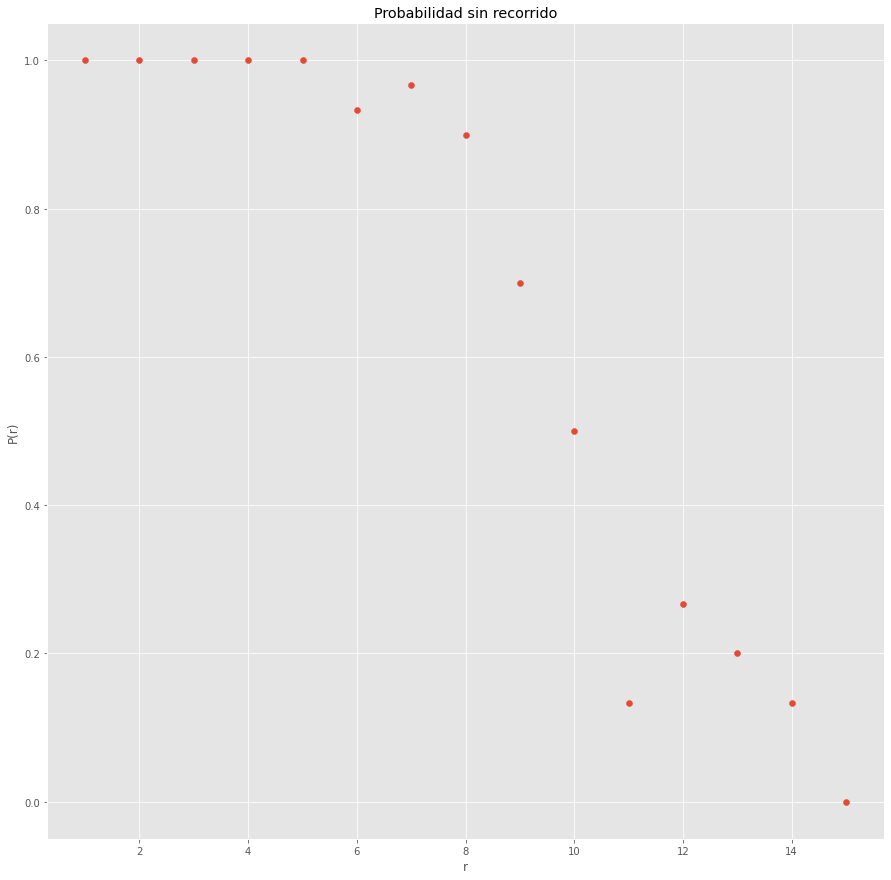

In [7]:
plt.figure(figsize = (15, 15))
plt.title("Probabilidad sin recorrido")
plt.xlabel("r")
plt.ylabel("P(r)")
plt.scatter(range(1,16), probas)
plt.show()

In [8]:
np.append(np.NAN,np.array([1,2])) == np.append(np.NAN,np.array([1,2]))

array([False,  True,  True])

In [9]:
def simular_match_desplazo(n_sim, r_min, l = 20):
    """
    descripción:
        función simular n_sim pares de secuencias y comparar el número de match
    input:
        n_sim (int): número de simulaciones
        r_min (int): tamaño mínimo de coincidencias
        l (int): tamaño de la secuencia
    output:
        (n_casos_exitosos, probabilidad_ocurrencia_r)
        n_casos_exitosos: número de simulaciones que cumplieron tener un mínimo de r coincidencias
        probabilidad_ocurrencia_r: n_casos_exitosos / n_sim
    """
    n_casos_exitosos = 0
    for i in range(n_sim):
        flag = False #Bandera que indica si paso el evento o no
        sec1 = generar_secuencia(l = l)
        sec2 = generar_secuencia(l = l)
        #print("==================")
        for j in range(0, l - r_min):
            if np.sum(sec2 == sec1) >= r_min:
                flag = True
                break
             #   print("Encontrado")
            sec1 = np.append(sec1, np.NAN)
            sec2 = np.append(np.NAN, sec2)
            #print(sec1, sec2)
        n_casos_exitosos += flag
    return n_casos_exitosos, n_casos_exitosos / n_sim 

In [10]:
simular_match_desplazo(30, 15)

(3, 0.1)

In [11]:
probas_desplaza = np.array([])
for i in range(1, 16):
    _, proba = simular_match_desplazo(30, i)
    probas_desplaza = np.append(probas_desplaza, proba)

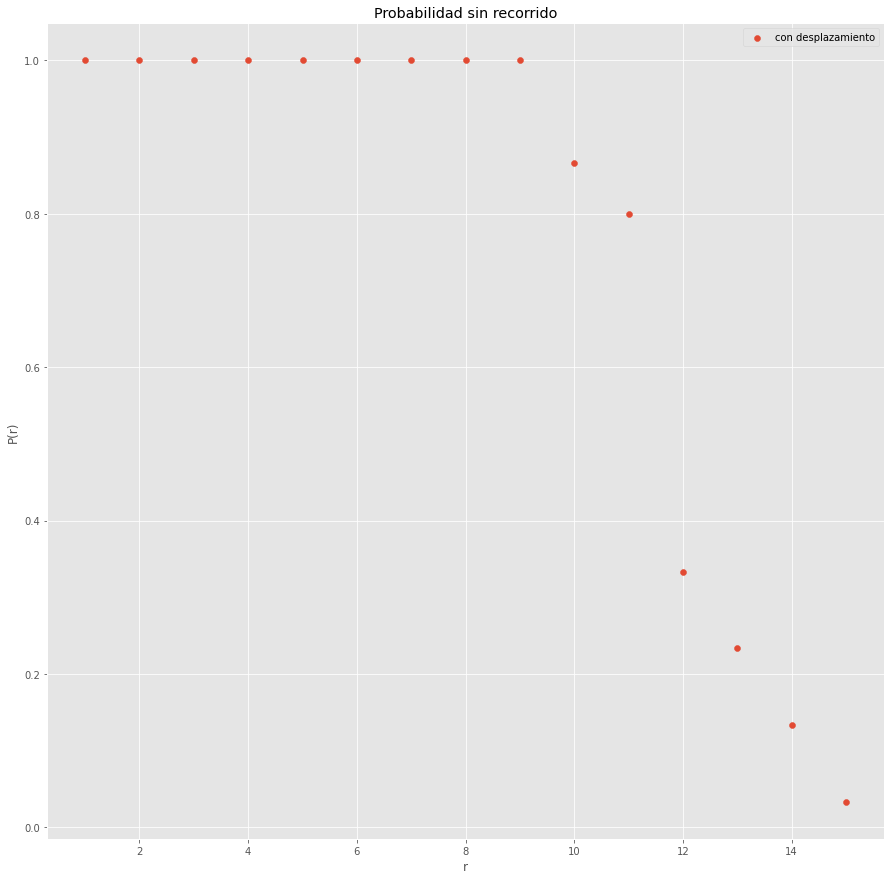

In [12]:
plt.figure(figsize = (15, 15))
plt.title("Probabilidad sin recorrido")
plt.xlabel("r")
plt.ylabel("P(r)")
plt.scatter(range(1,16), probas_desplaza, label = "con desplazamiento")
plt.legend()
plt.show()

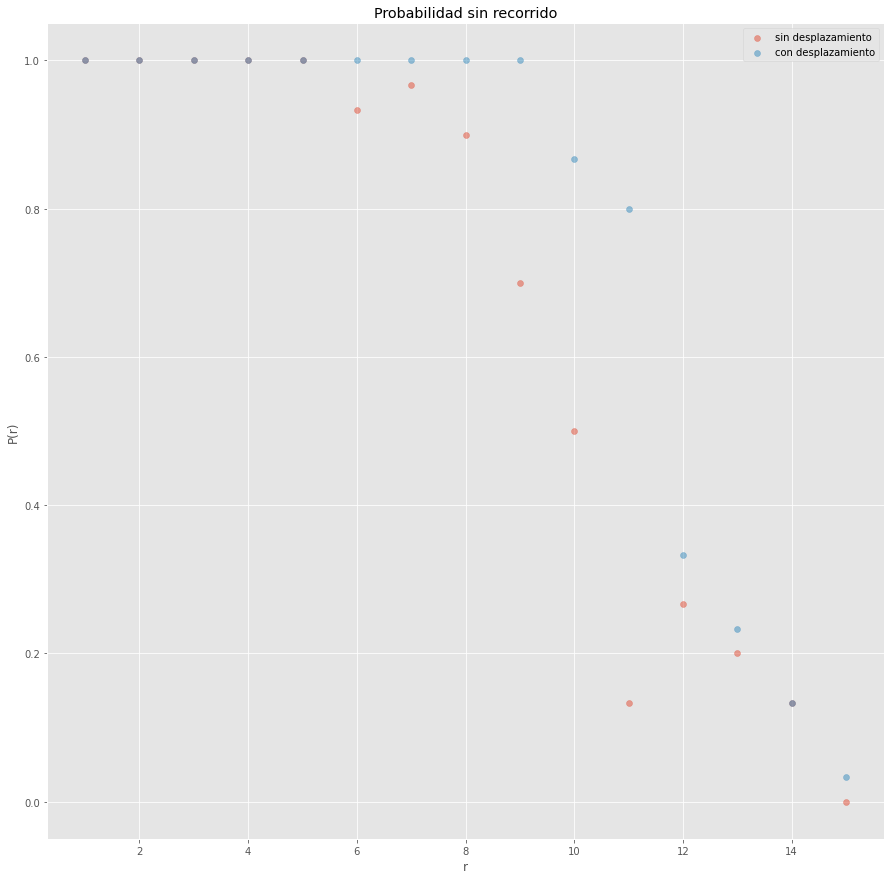

In [13]:
plt.figure(figsize = (15, 15))
plt.title("Probabilidad sin recorrido")
plt.xlabel("r")
plt.ylabel("P(r)")
plt.scatter(range(1,16), probas, label = "sin desplazamiento", alpha = 0.5)
plt.scatter(range(1,16), probas_desplaza, label = "con desplazamiento", alpha = 0.5)
plt.legend()
plt.show()

## Conclusiones:
Como era de esperarse el desplazamiento permite más posibilidades de que existan coincidencias de tamaños más grandes, en el caso de eventos con posibilidad de mover las cadenas se tiene una probabilidad de 1 hasta r = 9, mientras que en el caso de no desplazamiento la probabilidad de 1 se mantiene hasta r = 5
